**What is hypothesis testing ?**

Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.

- Ex : you say avg student in class is 40 or a boy is taller than girls.

- All those example we assume need some statistic way to prove those. we need some mathematical conclusion what ever we are assuming is true.

**Why do we use it ?**

Hypothesis testing is an essential procedure in statistics. A hypothesis test evaluates two mutually exclusive statements about a population to determine which statement is best supported by the sample data. When we say that a finding is statistically significant, it’s thanks to a hypothesis test.

**Which are important parameter of hypothesis testing ?**

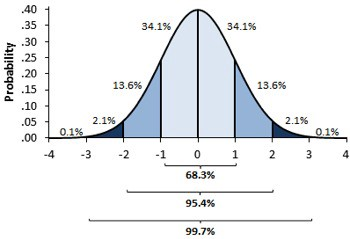


**Null hypothesis :-** In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups
In other words it is a basic assumption or made based on domain or problem knowledge.

Example : a company production is = 50 unit/per day etc.

**Alternative hypothesis :-**
The alternative hypothesis is the hypothesis used in hypothesis testing that is contrary to the null hypothesis. It is usually taken to be that the observations are the result of a real effect (with some amount of chance variation superposed)

Example : a company production is !=50 unit/per day etc.

**One tailed test :-** A test of a statistical hypothesis , where the region of rejection is on only one side of the sampling distribution , is called a one-tailed test.

Example :- a student has ≥ 800 marks or math score ≥ 80%

**Two-tailed test :-** A two-tailed test is a statistical test in which the critical area of a distribution is two-sided and tests whether a sample is greater than or less than a certain range of values. If the sample being tested falls into either of the critical areas, the alternative hypothesis is accepted instead of the null hypothesis.

Example : a student != 800 marks or mark score != 80% 

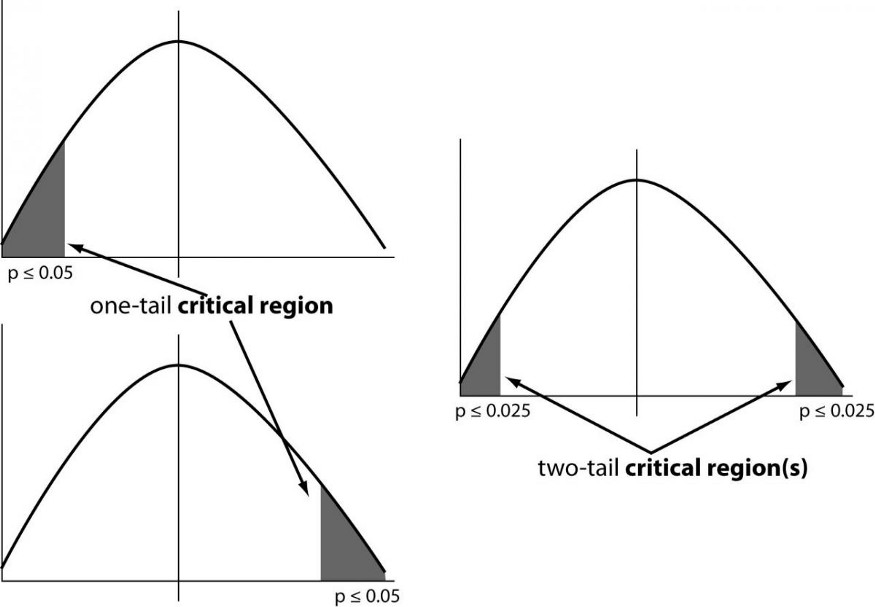

**p-value** 

The P value, or calculated probability, is the probability of finding the observed, or more extreme, results when the null hypothesis (H 0) of a study question is true — the definition of ‘extreme’ depends on how the hypothesis is being tested.

#### Example:  You have a coin and you don’t know whether that is fair or tricky so let’s decide null and alternate hypothesis

- H0 : a coin is a fair coin.
- H1 : a coin is a tricky coin. and alpha = 5% or 0.05

- Now let’s toss the coin and calculate p- value ( probability value).
Toss a coin 1st time and result is tail- P-value = 50% (as head and tail have equal probability)

- Toss a coin 2nd time and result is tail, now p-value = 50/2 = 25%
and similarly we,
- Toss 6 consecutive time and got result as P-value = 1.5% but we set our significance level as 95% means 5% error rate we allow and here we see we are beyond that level i.e. our null- hypothesis does not hold good so we need to reject and propose that this coin is a tricky coin which is actually.

## Types of Tests:

1.   T Test
2.   Z Test
3.   Annova
4.   Chi-Square

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Stats/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


There are many features in the dataset such as Gender, Dependents, Education, Applicant Income, Loan Amount, Credit history. We will be using these features and check whether one feature effect affects other features using several tests i.e Z-Test, correlation test, ANOVA test, and Chi-square test.

## Z-Test

- A Z-test is used to compare the mean of two given samples and infer whether they are from the same distribution or not. We do not implement Z-test when the sample size is less than 30.

- A Z-Test may be a one-sample Z test or a two-sample Z test.

- The One-Sample t-Test determines whether the sample mean is statistically different from a known or hypothesized population mean. The two-sample Z-test compares 2 independent variables.

- We will implement a two-sample Z test.

- Z statistic is denoted by:

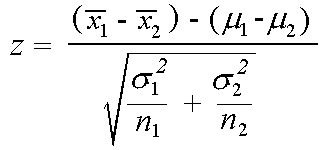

Please note that we will implement 2 sample z-test where one variable will be categorical with two categories and the other variable will be continuous to apply the z-test.

Here we will be using the Gender categorial variable and ApplicantIncome continuous variable. Gender has 2 groups: male and female. Therefore the hypothesis will be:

Null Hypothesis: There is no significant difference between the mean Income of males and females.

Alternate Hypothesis: There is a significant difference between the mean Income of males and females.

In [6]:
M_mean=df.loc[df['Gender']=='Male','ApplicantIncome'].mean()
F_mean=df.loc[df['Gender']=='Female','ApplicantIncome'].mean()
M_std=df.loc[df['Gender']=='Male','ApplicantIncome'].std()
F_std=df.loc[df['Gender']=='Female','ApplicantIncome'].std()
no_of_M=df.loc[df['Gender']=='Male','ApplicantIncome'].count()
no_of_F=df.loc[df['Gender']=='Female','ApplicantIncome'].count()

In [8]:
F_mean

4643.473214285715

In [7]:
M_mean

5446.460122699386

In [9]:
def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z,3), pval
z,p= twoSampZ(M_mean,F_mean,0,M_std,F_std,no_of_M,no_of_F)
print("Z & p values respectively are: " , z, "and", p)

Z & p values respectively are:  1.828 and 0.06759726635832197


In [ ]:
if p<0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

we accept null hypothesis


Since value p is greater than 0.5 we accept the null hypothesis. Therefore, we conclude that there is no significant difference between the income of males and females.

## T Test

- A t-test is also used to compare the mean of two given samples like the Z-test. However, It is implemented when the sample size is less than 30. It assumes a normal distribution of the sample. It can also be one-sample or two-sample. The degree of freedom is calculated by n-1 where n is the number of samples.

- It is denoted by:

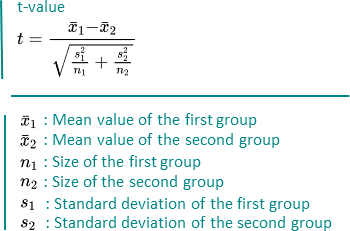


- It will be implemented the same as Z-test. The only condition is sample size should be less than 30. I have shown you Z- Test implementation. Now, you can try your hands on the T-Test.

## Correlation Test

- A correlation test is a metric to evaluate the extent to which variables are associated with one another.

- Please note that the variables must be continuous to apply the correlation test.

- There are several methods for correlation tests i.e. Covariance, Pearson correlation coefficient, Spearman rank correlation coefficient, etc.

- We will use the person correlation coefficient since it is independent of the values of variables.-

### Pearson Correlation Coefficient

- It is used to measure the linear correlation between 2 variables. It is denoted by

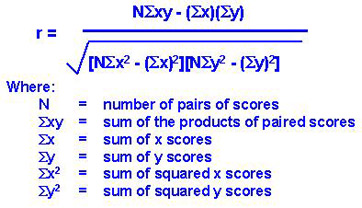

In [10]:
# Lets analyse LoanAmount

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
pcc = np.corrcoef(df.ApplicantIncome, df.LoanAmount)
print(pcc)

[[1.         0.56562046]
 [0.56562046 1.        ]]


The values on the diagonals indicate the correlation of features with themselves. 0.56 represent that there is some correlation between the two features.

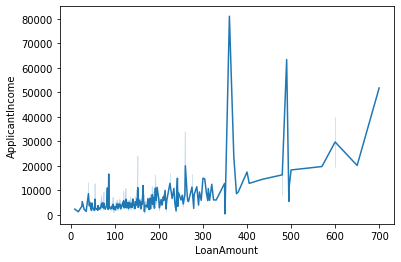

In [ ]:
sns.lineplot(data=df,x='LoanAmount',y='ApplicantIncome')

## ANOVA Test

ANOVA stands for Analysis of variance. As the name, suggests it uses variance as its parameter to compare multiple independent groups. ANOVA can be one-way ANOVA or two-way ANOVA. One-way ANOVA is applied when there are three or more independent groups of a variable. We will implement the same in python.

#### F-Statistics can be calculated as:

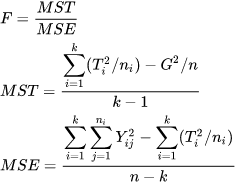

#### Implementation

Here we will be using the Dependents categorial variable and ApplicantIncome continuous variable. Dependents has 4 groups: 0,1,2,3+. Therefore the hypothesis will be:

Null Hypothesis: There is no significant difference between the mean Income among different groups of dependents.

Alternate Hypothesis: There is a significant difference between the mean Income among different groups of dependents.

In [11]:
df['Dependents'].isnull().sum()
df['Dependents']=df['Dependents'].fillna('0')

In [12]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [13]:
df_anova = df[['Dependents','ApplicantIncome']]

In [15]:
grps = pd.unique(df.Dependents.values)
d_data = {grp:df_anova['ApplicantIncome'][df_anova.Dependents == grp] for grp in grps}
F, p = stats.f_oneway(d_data['0'], d_data['1'])

In [16]:
print('F ={},p={}'.format(F,p))

F =3.2607598144037464,p=0.07160981828063814


In [ ]:
if p<0.05:
  print("reject null hypothesis")
else:
  print("accept null hypothesis") 

accept null hypothesis


Since value p is less than 0.5 we reject the null hypothesis. Therefore, we conclude that there is no significant difference between the income of several groups of Dependents.

## Chi-Square Test

- This test is applied when you have two categorical variables from a population. It is used to determine whether there is a significant association or relationship between the two variables.

- There are 2 types of chi-square tests: chi-square goodness of fit and chi-square test for independence, we will implement the latter one.

- The degree of freedom in the chi-square test is calculated by (n-1)*(m-1) where n and m are numbers of rows and columns respectively.

### It is denoted by:

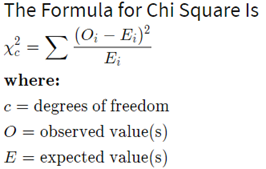



#### Implementation

We will be using two categorical features Gender and Loan Status and find whether there is an association between them using the chi-square test.

Null Hypothesis: There is no significant association between Gender and Loan Status features.

Alternate Hypothesis: There is a significant association between Gender and Loan Status features.

In [17]:
dataset_table=pd.crosstab(df['Gender'],df['Loan_Status'])
dataset_table

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


Then, we calculate observed and expected values using the above table.

In [18]:
observed=dataset_table.values
val2=stats.chi2_contingency(dataset_table)
expected=val2[3]

Then we calculate the chi-square statistic and p-value using the following code:

In [19]:
alpha=0.5
ddof =1

In [21]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=1)

In [22]:
print("chi-square statistic:-",chi_square_statistic)

print('Significance level: ',alpha)

print('Degree of Freedom: ',ddof)

print('p-value:',p_value)

chi-square statistic:- 0.23697508750826923
Significance level:  0.5
Degree of Freedom:  1
p-value: 0.6263994534115932


In [ ]:
if p_value<=alpha:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypthesis")

Accept Null Hypthesis


Since the p-value is greater than 0.05, we accept the null hypothesis. We conclude that there is no significant association between the two features.